In [1]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import holidays
import xgboost as xgb

In [5]:
data=pd.read_excel('C:/Users/jayateja.ch/Desktop/dataset/EXcelr/Project/PJMW_MW_Hourly.xlsx')

In [6]:
data.head(10)

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0
5,2002-12-31 06:00:00,5126.0
6,2002-12-31 07:00:00,5493.0
7,2002-12-31 08:00:00,5824.0
8,2002-12-31 09:00:00,5962.0
9,2002-12-31 10:00:00,6019.0


In [7]:
dat=data.copy()

In [8]:
dat

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0
...,...,...
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0


In [9]:
data.tail(10)

,Datetime,PJMW_MW
143196,2018-01-01 15:00:00,7475.0
143197,2018-01-01 16:00:00,7514.0
143198,2018-01-01 17:00:00,7747.0
143199,2018-01-01 18:00:00,8213.0
143200,2018-01-01 19:00:00,8328.0
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0
143205,2018-01-02 00:00:00,7691.0


In [10]:
data.shape

(143206, 2)

In [11]:
data.columns

Index(['Datetime', 'PJMW_MW'], dtype='object')

In [12]:
data.nunique()

Datetime    143202
PJMW_MW       5343
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  143206 non-null  datetime64[ns]
 1   PJMW_MW   143206 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


In [14]:
data['Datetime'] = pd.to_datetime( data['Datetime'] )

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  143206 non-null  datetime64[ns]
 1   PJMW_MW   143206 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


In [16]:
cols_new = ['datetime', 'energy_consumption']
data.columns=cols_new

In [17]:
data.columns

Index(['datetime', 'energy_consumption'], dtype='object')

In [18]:
data.isna().sum()

datetime              0
energy_consumption    0
dtype: int64

In [19]:
data.describe()

,energy_consumption
count,143206.000000
mean,5602.375089
std,979.142872
min,487.000000
25%,4907.000000
50%,5530.000000
75%,6252.000000
max,9594.000000


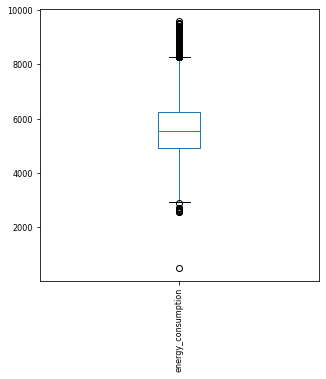

In [20]:
boxplot = data. boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)

In [21]:
df=data

In [22]:
df['year'] = pd.DatetimeIndex(df['datetime']).year

In [23]:
df['month'] = pd.DatetimeIndex(df['datetime']).month

In [24]:
df

,datetime,energy_consumption,year,month
0,2002-12-31 01:00:00,5077.0,2002,12
1,2002-12-31 02:00:00,4939.0,2002,12
2,2002-12-31 03:00:00,4885.0,2002,12
3,2002-12-31 04:00:00,4857.0,2002,12
4,2002-12-31 05:00:00,4930.0,2002,12
...,...,...,...,...
143201,2018-01-01 20:00:00,8401.0,2018,1
143202,2018-01-01 21:00:00,8373.0,2018,1
143203,2018-01-01 22:00:00,8238.0,2018,1
143204,2018-01-01 23:00:00,7958.0,2018,1


In [25]:
df['date'] = pd.DatetimeIndex(df['datetime']).day


In [26]:
df

,datetime,energy_consumption,year,month,date
0,2002-12-31 01:00:00,5077.0,2002,12,31
1,2002-12-31 02:00:00,4939.0,2002,12,31
2,2002-12-31 03:00:00,4885.0,2002,12,31
3,2002-12-31 04:00:00,4857.0,2002,12,31
4,2002-12-31 05:00:00,4930.0,2002,12,31
...,...,...,...,...,...
143201,2018-01-01 20:00:00,8401.0,2018,1,1
143202,2018-01-01 21:00:00,8373.0,2018,1,1
143203,2018-01-01 22:00:00,8238.0,2018,1,1
143204,2018-01-01 23:00:00,7958.0,2018,1,1


In [27]:
df['hour'] = pd.DatetimeIndex(df['datetime']).hour

In [28]:
df

,datetime,energy_consumption,year,month,date,hour
0,2002-12-31 01:00:00,5077.0,2002,12,31,1
1,2002-12-31 02:00:00,4939.0,2002,12,31,2
2,2002-12-31 03:00:00,4885.0,2002,12,31,3
3,2002-12-31 04:00:00,4857.0,2002,12,31,4
4,2002-12-31 05:00:00,4930.0,2002,12,31,5
...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,8401.0,2018,1,1,20
143202,2018-01-01 21:00:00,8373.0,2018,1,1,21
143203,2018-01-01 22:00:00,8238.0,2018,1,1,22
143204,2018-01-01 23:00:00,7958.0,2018,1,1,23


In [29]:
df['season'] = df['datetime'].apply( lambda x: 'Winter' if x.month == 11 or x.month == 12 or x.month == 1 
                                      else 'Spring' if  x.month == 2 or x.month == 3
                                      else 'Summer' if  x.month == 4 or x.month == 5 or x.month == 6
                                      else 'Rainy'  if  x.month==7 or x.month==8
                                      else 'Autumn' if  x.month == 9 or x.month == 10
                                      else '')

In [30]:
df

,datetime,energy_consumption,year,month,date,hour,season
0,2002-12-31 01:00:00,5077.0,2002,12,31,1,Winter
1,2002-12-31 02:00:00,4939.0,2002,12,31,2,Winter
2,2002-12-31 03:00:00,4885.0,2002,12,31,3,Winter
3,2002-12-31 04:00:00,4857.0,2002,12,31,4,Winter
4,2002-12-31 05:00:00,4930.0,2002,12,31,5,Winter
...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,8401.0,2018,1,1,20,Winter
143202,2018-01-01 21:00:00,8373.0,2018,1,1,21,Winter
143203,2018-01-01 22:00:00,8238.0,2018,1,1,22,Winter
143204,2018-01-01 23:00:00,7958.0,2018,1,1,23,Winter


In [31]:
df['dayofweek'] = df['datetime'].dt.weekday

In [32]:
df['dayname'] = df['datetime'].dt.day_name()

In [33]:
df.head(50)

,datetime,energy_consumption,year,month,date,hour,season,dayofweek,dayname
0,2002-12-31 01:00:00,5077.0,2002,12,31,1,Winter,1,Tuesday
1,2002-12-31 02:00:00,4939.0,2002,12,31,2,Winter,1,Tuesday
2,2002-12-31 03:00:00,4885.0,2002,12,31,3,Winter,1,Tuesday
3,2002-12-31 04:00:00,4857.0,2002,12,31,4,Winter,1,Tuesday
4,2002-12-31 05:00:00,4930.0,2002,12,31,5,Winter,1,Tuesday
5,2002-12-31 06:00:00,5126.0,2002,12,31,6,Winter,1,Tuesday
6,2002-12-31 07:00:00,5493.0,2002,12,31,7,Winter,1,Tuesday
7,2002-12-31 08:00:00,5824.0,2002,12,31,8,Winter,1,Tuesday
8,2002-12-31 09:00:00,5962.0,2002,12,31,9,Winter,1,Tuesday
9,2002-12-31 10:00:00,6019.0,2002,12,31,10,Winter,1,Tuesday


In [34]:
india_holidays = holidays.IN()


In [35]:
df['Fulldate']=df['datetime'].dt.date

In [36]:
df['holidays'] = df['Fulldate'].apply( lambda x: 'Holiday' if x in india_holidays else 'Holiday' if x + datetime.timedelta(days=1) in india_holidays else 'Normal day' )

In [37]:
df.head(50)

,datetime,energy_consumption,year,month,date,hour,season,dayofweek,dayname,Fulldate,holidays
0,2002-12-31 01:00:00,5077.0,2002,12,31,1,Winter,1,Tuesday,2002-12-31,Normal day
1,2002-12-31 02:00:00,4939.0,2002,12,31,2,Winter,1,Tuesday,2002-12-31,Normal day
2,2002-12-31 03:00:00,4885.0,2002,12,31,3,Winter,1,Tuesday,2002-12-31,Normal day
3,2002-12-31 04:00:00,4857.0,2002,12,31,4,Winter,1,Tuesday,2002-12-31,Normal day
4,2002-12-31 05:00:00,4930.0,2002,12,31,5,Winter,1,Tuesday,2002-12-31,Normal day
5,2002-12-31 06:00:00,5126.0,2002,12,31,6,Winter,1,Tuesday,2002-12-31,Normal day
6,2002-12-31 07:00:00,5493.0,2002,12,31,7,Winter,1,Tuesday,2002-12-31,Normal day
7,2002-12-31 08:00:00,5824.0,2002,12,31,8,Winter,1,Tuesday,2002-12-31,Normal day
8,2002-12-31 09:00:00,5962.0,2002,12,31,9,Winter,1,Tuesday,2002-12-31,Normal day
9,2002-12-31 10:00:00,6019.0,2002,12,31,10,Winter,1,Tuesday,2002-12-31,Normal day


In [38]:
df['holidays'].unique()

array(['Normal day', 'Holiday'], dtype=object)

In [39]:
df. loc[df["holidays"]=='Holiday']

,datetime,energy_consumption,year,month,date,hour,season,dayofweek,dayname,Fulldate,holidays
144,2002-12-25 01:00:00,5064.0,2002,12,25,1,Winter,2,Wednesday,2002-12-25,Holiday
145,2002-12-25 02:00:00,4849.0,2002,12,25,2,Winter,2,Wednesday,2002-12-25,Holiday
146,2002-12-25 03:00:00,4714.0,2002,12,25,3,Winter,2,Wednesday,2002-12-25,Holiday
147,2002-12-25 04:00:00,4668.0,2002,12,25,4,Winter,2,Wednesday,2002-12-25,Holiday
148,2002-12-25 05:00:00,4695.0,2002,12,25,5,Winter,2,Wednesday,2002-12-25,Holiday
...,...,...,...,...,...,...,...,...,...,...,...
142914,2018-01-13 21:00:00,7497.0,2018,1,13,21,Winter,5,Saturday,2018-01-13,Holiday
142915,2018-01-13 22:00:00,7483.0,2018,1,13,22,Winter,5,Saturday,2018-01-13,Holiday
142916,2018-01-13 23:00:00,7299.0,2018,1,13,23,Winter,5,Saturday,2018-01-13,Holiday
142917,2018-01-14 00:00:00,7074.0,2018,1,14,0,Winter,6,Sunday,2018-01-14,Holiday


In [40]:
df.dtypes

datetime              datetime64[ns]
energy_consumption           float64
year                           int64
month                          int64
date                           int64
hour                           int64
season                        object
dayofweek                      int64
dayname                       object
Fulldate                      object
holidays                      object
dtype: object

<AxesSubplot:>

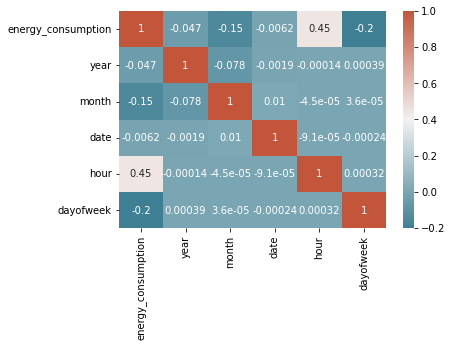

In [41]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


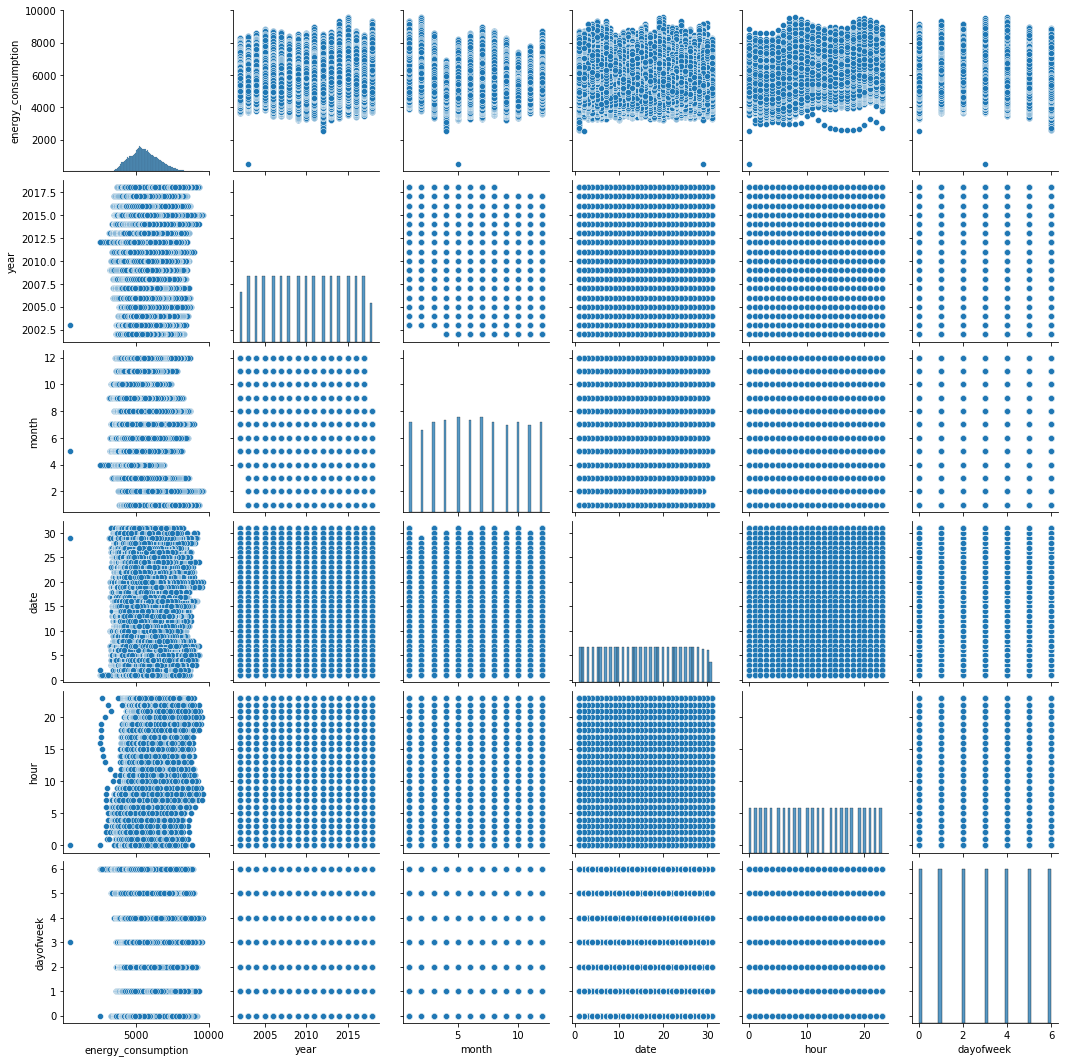

In [42]:
sns.pairplot(df)

C:\Users\jayateja.ch\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy_consumption'>

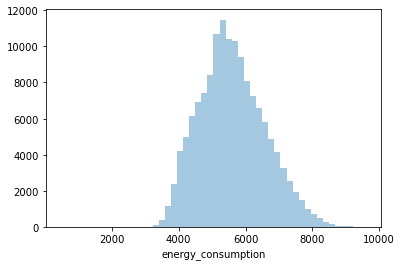

In [43]:
sns.distplot( df['energy_consumption'], kde=False )

In [44]:
df2=df.copy()

C:\Users\jayateja.ch\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayateja.ch\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='energy_consumption', ylabel='Density'>

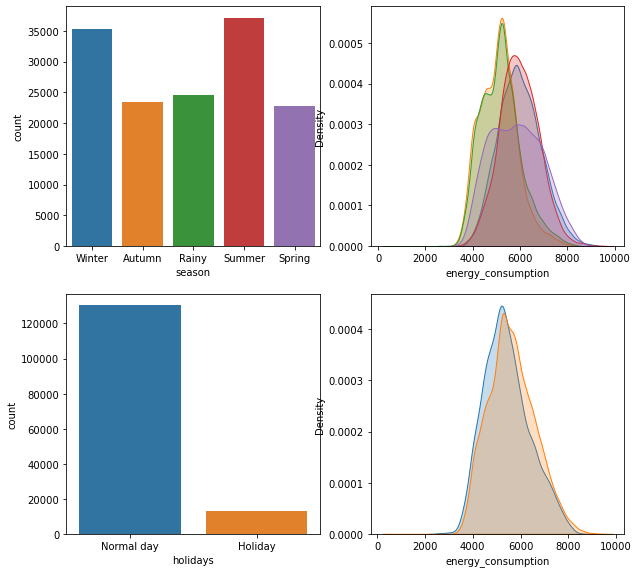

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(10, 15))
plt.subplot(3,2,1)
sns.countplot( df2['season'] )
plt.subplot(3,2,2)
sns.kdeplot( df2[df2['season'] == 'Winter']['energy_consumption'], label='Winter', shade=True )
sns.kdeplot( df2[df2['season'] == 'Autumn']['energy_consumption'], label='Autumn', shade=True )
sns.kdeplot( df2[df2['season'] == 'Summer']['energy_consumption'], label='Summer', shade=True )
sns.kdeplot( df2[df2['season'] == 'Spring']['energy_consumption'], label='Spring', shade=True )
sns.kdeplot( df2[df2['season'] == 'Rainy']['energy_consumption'], label='Spring', shade=True )
# holidays

plt.subplot( 3, 2, 3)
sns.countplot( df2['holidays'] )

plt.subplot( 3, 2, 4)
sns.kdeplot( df2[df2['holidays'] == 'Holiday']['energy_consumption'], label='Holiday', shade=True )
sns.kdeplot( df2[df2['holidays'] == 'Normal day']['energy_consumption'], label='Normal day', shade=True )

In [46]:
df2['energy_consumption']=df2['energy_consumption'].astype(float)

<AxesSubplot:xlabel='season'>

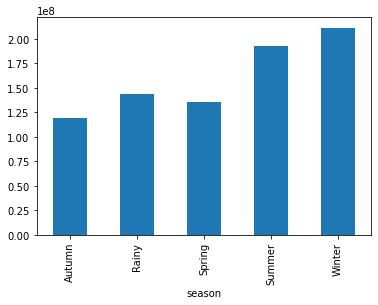

In [47]:
df2.groupby('season')['energy_consumption'].sum().plot.bar()

<AxesSubplot:xlabel='dayname'>

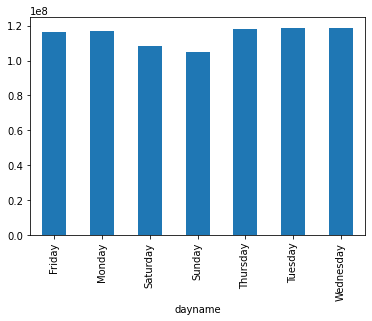

In [48]:
df2.groupby('dayname')['energy_consumption'].sum().plot.bar()

<AxesSubplot:xlabel='holidays'>

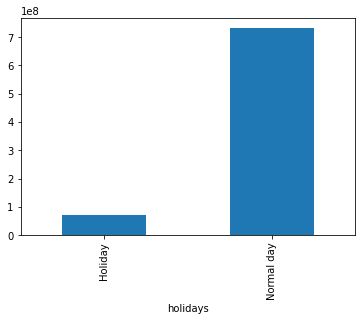

In [49]:
df2.groupby('holidays')['energy_consumption'].sum().plot.bar()

<AxesSubplot:>

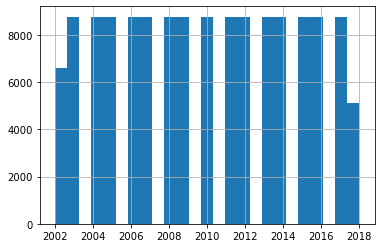

In [50]:
df2['year'].hist( bins=25 )

<AxesSubplot:>

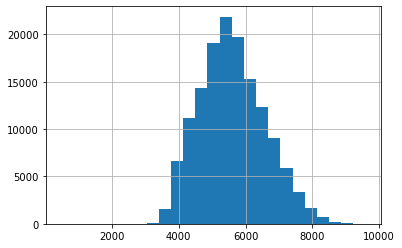

In [51]:
df2['energy_consumption'].hist( bins=25 )

<AxesSubplot:xlabel='hour'>

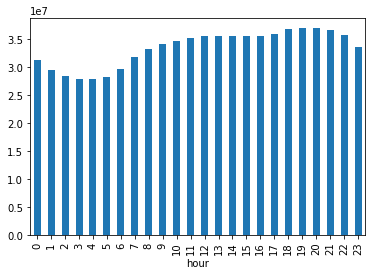

In [52]:
df2.groupby('hour')['energy_consumption'].sum().plot.bar()

In [53]:
df4=df2.copy()

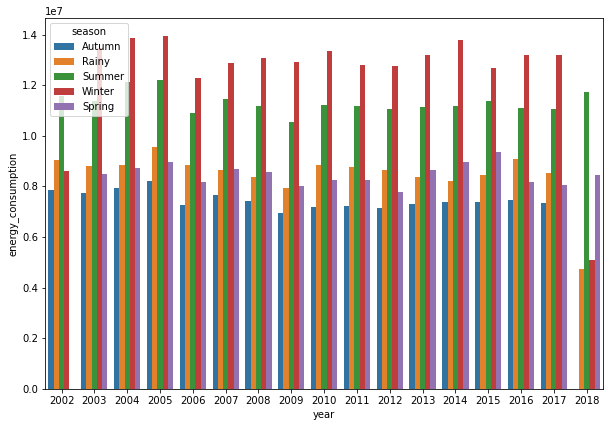

In [54]:
fig, axs = plt.subplots(figsize=(10, 15))
aux2 = df4[['year', 'season', 'energy_consumption']].groupby( ['year', 'season'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='energy_consumption', hue='season', data=aux2);

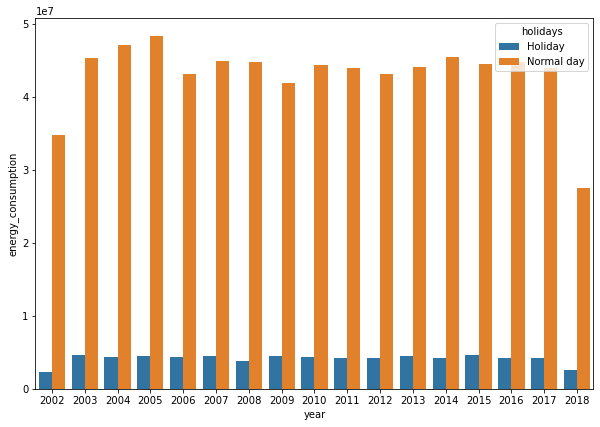

In [55]:
fig, axs = plt.subplots(figsize=(10, 15))
aux2 = df4[['year', 'holidays', 'energy_consumption']].groupby( ['year', 'holidays'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='energy_consumption', hue='holidays', data=aux2 );

<AxesSubplot:xlabel='dayofweek'>

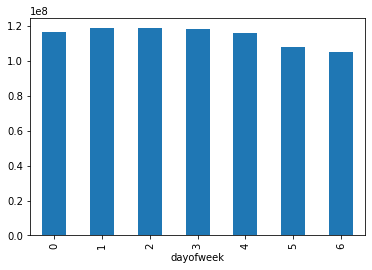

In [56]:
df4.groupby('dayofweek')['energy_consumption'].sum().plot.bar()

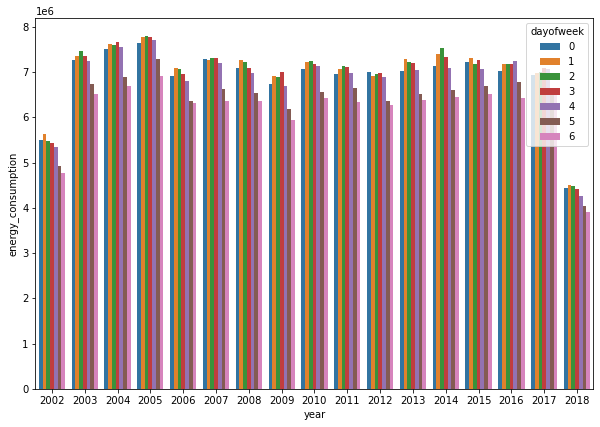

In [57]:
fig, axs = plt.subplots(figsize=(10, 15))
aux2 = df4[['year', 'dayofweek', 'energy_consumption']].groupby( ['year', 'dayofweek'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='energy_consumption', hue='dayofweek', data=aux2 );

In [58]:
df3=df4.copy()

In [59]:
df3 = pd.get_dummies( df3, prefix=['holidays'], columns=['holidays'] )  # one hot encoding

In [60]:
df3['energy_consumption'] = np.log1p( df3['energy_consumption'] ) # transforming the energy consumption to smaller value by using log.

Wind direction, seasons, time, days (of a month, year, etc.) are all cyclical variables. 
A more general rule of thumb is anything is cyclical in real life (wind direction), repeats (seasons) or has an important denominator (days of a month or year)

In [61]:
# to convert them into cyclical variable we need to use formula.
df3['hour_of_day_sin'] = df3['hour'].apply( lambda x: np.sin( x * ( 2. * np.pi/24 ) ) )
df3['hour_of_day_cos'] = df3['hour'].apply( lambda x: np.cos( x * ( 2. * np.pi/24 ) ) )


In [62]:
dicto = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4,'Rainy': 5}
df3['season'] = df3['season'].map(dicto)
df3['season_sin'] = df3['season'].apply( lambda x: np.sin( x * ( 2. * np.pi/4 ) ) )
df3['season_cos'] = df3['season'].apply( lambda x: np.cos( x * ( 2. * np.pi/4 ) ) )

In [63]:
df3['day_of_week_sin'] = df3['dayofweek'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
df3['day_of_week_cos'] = df3['dayofweek'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )

In [64]:
df3

,datetime,energy_consumption,year,month,date,hour,season,dayofweek,dayname,Fulldate,holidays_Holiday,holidays_Normal day,hour_of_day_sin,hour_of_day_cos,season_sin,season_cos,day_of_week_sin,day_of_week_cos
0,2002-12-31 01:00:00,8.532673,2002,12,31,1,1,1,Tuesday,2002-12-31,0,1,0.258819,0.965926,1.0,6.123234e-17,0.781831,0.62349
1,2002-12-31 02:00:00,8.505121,2002,12,31,2,1,1,Tuesday,2002-12-31,0,1,0.500000,0.866025,1.0,6.123234e-17,0.781831,0.62349
2,2002-12-31 03:00:00,8.494129,2002,12,31,3,1,1,Tuesday,2002-12-31,0,1,0.707107,0.707107,1.0,6.123234e-17,0.781831,0.62349
3,2002-12-31 04:00:00,8.488382,2002,12,31,4,1,1,Tuesday,2002-12-31,0,1,0.866025,0.500000,1.0,6.123234e-17,0.781831,0.62349
4,2002-12-31 05:00:00,8.503297,2002,12,31,5,1,1,Tuesday,2002-12-31,0,1,0.965926,0.258819,1.0,6.123234e-17,0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,9.036225,2018,1,1,20,1,0,Monday,2018-01-01,0,1,-0.866025,0.500000,1.0,6.123234e-17,0.000000,1.00000
143202,2018-01-01 21:00:00,9.032887,2018,1,1,21,1,0,Monday,2018-01-01,0,1,-0.707107,0.707107,1.0,6.123234e-17,0.000000,1.00000
143203,2018-01-01 22:00:00,9.016634,2018,1,1,22,1,0,Monday,2018-01-01,0,1,-0.500000,0.866025,1.0,6.123234e-17,0.000000,1.00000
143204,2018-01-01 23:00:00,8.982059,2018,1,1,23,1,0,Monday,2018-01-01,0,1,-0.258819,0.965926,1.0,6.123234e-17,0.000000,1.00000


In [65]:
df5=df3.copy()

In [66]:
df5.shape

(143206, 18)

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import xgboost as xg


from sklearn.metrics import mean_squared_error

In [68]:
df6=df5[['datetime','Fulldate','date','hour','year','month','season','dayofweek','holidays_Holiday','holidays_Normal day','energy_consumption']]

In [69]:
df6

,datetime,Fulldate,date,hour,year,month,season,dayofweek,holidays_Holiday,holidays_Normal day,energy_consumption
0,2002-12-31 01:00:00,2002-12-31,31,1,2002,12,1,1,0,1,8.532673
1,2002-12-31 02:00:00,2002-12-31,31,2,2002,12,1,1,0,1,8.505121
2,2002-12-31 03:00:00,2002-12-31,31,3,2002,12,1,1,0,1,8.494129
3,2002-12-31 04:00:00,2002-12-31,31,4,2002,12,1,1,0,1,8.488382
4,2002-12-31 05:00:00,2002-12-31,31,5,2002,12,1,1,0,1,8.503297
...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,2018-01-01,1,20,2018,1,1,0,0,1,9.036225
143202,2018-01-01 21:00:00,2018-01-01,1,21,2018,1,1,0,0,1,9.032887
143203,2018-01-01 22:00:00,2018-01-01,1,22,2018,1,1,0,0,1,9.016634
143204,2018-01-01 23:00:00,2018-01-01,1,23,2018,1,1,0,0,1,8.982059


In [70]:
df7=df6.loc[df6['year']>= 2017]

In [71]:
df7

,datetime,Fulldate,date,hour,year,month,season,dayofweek,holidays_Holiday,holidays_Normal day,energy_consumption
120550,2017-01-01 00:00:00,2017-01-01,1,0,2017,1,1,6,0,1,8.562549
129311,2017-12-31 01:00:00,2017-12-31,31,1,2017,12,1,6,0,1,8.840291
129312,2017-12-31 02:00:00,2017-12-31,31,2,2017,12,1,6,0,1,8.833317
129313,2017-12-31 03:00:00,2017-12-31,31,3,2017,12,1,6,0,1,8.832588
129314,2017-12-31 04:00:00,2017-12-31,31,4,2017,12,1,6,0,1,8.839856
...,...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,2018-01-01,1,20,2018,1,1,0,0,1,9.036225
143202,2018-01-01 21:00:00,2018-01-01,1,21,2018,1,1,0,0,1,9.032887
143203,2018-01-01 22:00:00,2018-01-01,1,22,2018,1,1,0,0,1,9.016634
143204,2018-01-01 23:00:00,2018-01-01,1,23,2018,1,1,0,0,1,8.982059


In [72]:
train=df7[( df7.year==2017) & (df7.month<=12)]
test=df7[( df7.year==2018) & (df7.month<=12)]

In [73]:
train

,datetime,Fulldate,date,hour,year,month,season,dayofweek,holidays_Holiday,holidays_Normal day,energy_consumption
120550,2017-01-01 00:00:00,2017-01-01,1,0,2017,1,1,6,0,1,8.562549
129311,2017-12-31 01:00:00,2017-12-31,31,1,2017,12,1,6,0,1,8.840291
129312,2017-12-31 02:00:00,2017-12-31,31,2,2017,12,1,6,0,1,8.833317
129313,2017-12-31 03:00:00,2017-12-31,31,3,2017,12,1,6,0,1,8.832588
129314,2017-12-31 04:00:00,2017-12-31,31,4,2017,12,1,6,0,1,8.839856
...,...,...,...,...,...,...,...,...,...,...,...
138066,2017-01-01 20:00:00,2017-01-01,1,20,2017,1,1,6,0,1,8.646641
138067,2017-01-01 21:00:00,2017-01-01,1,21,2017,1,1,6,0,1,8.642768
138068,2017-01-01 22:00:00,2017-01-01,1,22,2017,1,1,6,0,1,8.620472
138069,2017-01-01 23:00:00,2017-01-01,1,23,2017,1,1,6,0,1,8.577724


In [74]:
FEATURES = ['hour', 'dayofweek', 'month', 'year','date']

In [75]:
OUTPUT = ['energy_consumption']

In [76]:
X_train = train[FEATURES]
y_train = train[OUTPUT]

X_test = test[FEATURES]
y_test = test[OUTPUT]


In [77]:
reg = xg.XGBRegressor(n_estimators=1000,early_stopping_rounds=50, learning_rate=0.01)
reg.fit(
    X_train, 
    y_train, 
    eval_set=[(X_train, y_train),(X_test, y_test)],
    verbose=100
)

[0]	validation_0-rmse:8.01925	validation_1-rmse:8.08009
[100]	validation_0-rmse:2.93890	validation_1-rmse:3.00002
[200]	validation_0-rmse:1.08127	validation_1-rmse:1.14352
[300]	validation_0-rmse:0.40462	validation_1-rmse:0.46980
[400]	validation_0-rmse:0.16313	validation_1-rmse:0.23160
[500]	validation_0-rmse:0.08582	validation_1-rmse:0.15403
[600]	validation_0-rmse:0.06377	validation_1-rmse:0.13101
[700]	validation_0-rmse:0.05655	validation_1-rmse:0.12369
[800]	validation_0-rmse:0.05240	validation_1-rmse:0.12125
[900]	validation_0-rmse:0.04877	validation_1-rmse:0.12057
[999]	validation_0-rmse:0.04574	validation_1-rmse:0.12052


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
f1 = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])

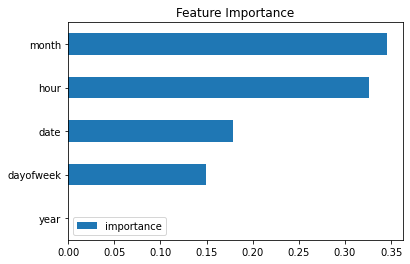

In [79]:
f1.sort_values('importance').plot(kind="barh",title="Feature Importance")
plt.show()

In [80]:
test['predictions'] = reg.predict(X_test)

C:\Users\jayateja.ch\AppData\Local\Temp\ipykernel_22532\118111341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = reg.predict(X_test)


In [81]:
df = df.merge(test[['predictions']], how='left',left_index=True, right_index=True)

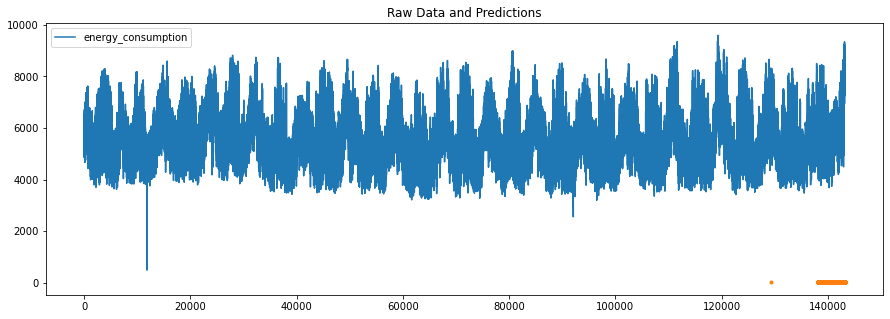

In [82]:
ax = df[['energy_consumption']].plot(figsize=(15,5))
df['predictions'].plot(ax=ax, style=".")
ax.set_title("Raw Data and Predictions")
plt.show()

In [83]:
score = np.sqrt(mean_squared_error(test['energy_consumption'],test['predictions']))
print(f'RMSE SCORE: {score}')

RMSE SCORE: 0.12052457251908882


In [84]:
color_pal = sns.color_palette()
plt.style.use('ggplot')
import warnings

# Filter out DeprecationWarnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
df8=df7.copy()

In [86]:
df8=df8.set_index('datetime')

In [87]:
df8.index=pd.to_datetime(df8.index)

In [88]:
train = df8.loc[df8.index < '01-01-2015']
test = df8.loc[df8.index >= '01-01-2015']

In [89]:
df8.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-12-31 01:00:00',
               '2017-12-31 02:00:00', '2017-12-31 03:00:00',
               '2017-12-31 04:00:00', '2017-12-31 05:00:00',
               '2017-12-31 06:00:00', '2017-12-31 07:00:00',
               '2017-12-31 08:00:00', '2017-12-31 09:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=13896, freq=None)

In [90]:
df8.index.date

array([datetime.date(2017, 1, 1), datetime.date(2017, 12, 31),
       datetime.date(2017, 12, 31), ..., datetime.date(2018, 1, 1),
       datetime.date(2018, 1, 1), datetime.date(2018, 1, 2)], dtype=object)

In [91]:
df8.index.day

Int64Index([ 1, 31, 31, 31, 31, 31, 31, 31, 31, 31,
            ...
             1,  1,  1,  1,  1,  1,  1,  1,  1,  2],
           dtype='int64', name='datetime', length=13896)

In [92]:
df8.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64', name='datetime', length=13896)

In [93]:
df8.index.week

Int64Index([52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
            ...
             1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', name='datetime', length=13896)

In [94]:
def create_features(df8):
    """
    Create time series features based on time series index.
    """
    df8 = df8.copy()
    df8['hour'] = df8.hour
    df8['dayofweek'] = df8.dayofweek
    df['month'] = df8.month
    df['year'] = df8.year
    df['date'] = df8.date
    df['day'] = df8.day
    df['week'] = df8.isocalendar().week
    return df8


In [100]:
dat1=dat[['Datetime','PJMW_MW']]

In [101]:
dat1

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0
...,...,...
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0


In [102]:
dat1=dat1.set_index('Datetime')

In [106]:
dat1.index=pd.to_datetime(dat1.index)

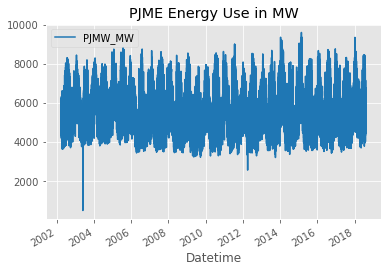

In [107]:
dat1.plot(color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

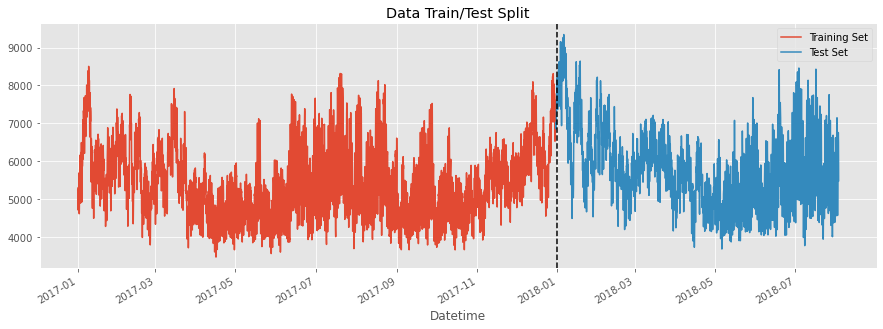

In [113]:
train = dat1.loc[(dat1.index >= '01-01-2017') & (dat1.index<='31-12-2017')]
test = dat1.loc[dat1.index >= '31-12-2017']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [115]:
def create_features(dat1):
    """
    Create time series features based on time series index.
    """
    dat1= dat1.copy()
    dat1['hour'] = dat1.index.hour
    dat1['dayofweek'] = dat1.index.dayofweek
    dat1['quarter'] = dat1.index.quarter
    dat1['month'] = dat1.index.month
    dat1['year'] = dat1.index.year
    dat1['dayofyear'] = dat1.index.dayofyear
    dat1['dayofmonth'] = dat1.index.day
    dat1['weekofyear'] = dat1.index.isocalendar().week
    return dat1

In [116]:
dat1=create_features(dat1)

In [118]:
dat1.head()

,PJMW_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,5077.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,4939.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,4885.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,4857.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,4930.0,5,1,4,12,2002,365,31,1


In [122]:
train = create_features(train)
test = create_features(test)

features = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
target = 'PJMW_MW'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [125]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=600,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[14:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5517.83255	validation_1-rmse:5889.06864
[100]	validation_0-rmse:2106.40057	validation_1-rmse:2490.05750
[200]	validation_0-rmse:935.16283	validation_1-rmse:1312.97956
[300]	validation_0-rmse:592.84891	validation_1-rmse:929.68107
[400]	validation_0-rmse:498.53266	validation_1-rmse:802.89719
[500]	validation_0-rmse:463.22449	validation_1-rmse:760.00662
[599]	validation_0-rmse:442.02987	validation_1-rmse:744.28503


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=600, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [126]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=200,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=True)

[14:36:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5517.83255	validation_1-rmse:5889.06864
[1]	validation_0-rmse:5463.59583	validation_1-rmse:5835.14247
[2]	validation_0-rmse:5409.90958	validation_1-rmse:5781.75504
[3]	validation_0-rmse:5356.76849	validation_1-rmse:5728.91864
[4]	validation_0-rmse:5304.16717	validation_1-rmse:5676.61076
[5]	validation_0-rmse:5252.10023	validation_1-rmse:5624.84275
[6]	validation_0-rmse:5200.56262	validation_1-rmse:5573.60632
[7]	validation_0-rmse:5149.54860	validation_1-rmse:5522.87666
[8]	validation_0-rmse:5099.05372	validation_1-rmse:5472.67780
[9]	validation_0-rmse:5049.07246	validation_1-rmse:5422.97376
[10]	validation_0-rmse:4999.59971	validation_1-rmse:5373.76995
[11]	validation_0-rmse:4950.62032	validation_1-rmse:5324.83259
[12]	validation_0-rmse:

[127]	validation_0-rmse:1651.33452	validation_1-rmse:2037.27647
[128]	validation_0-rmse:1637.04794	validation_1-rmse:2023.09862
[129]	validation_0-rmse:1622.65895	validation_1-rmse:2008.56165
[130]	validation_0-rmse:1608.43064	validation_1-rmse:1994.10928
[131]	validation_0-rmse:1594.61170	validation_1-rmse:1980.53182
[132]	validation_0-rmse:1580.69329	validation_1-rmse:1966.50362
[133]	validation_0-rmse:1567.18068	validation_1-rmse:1953.14582
[134]	validation_0-rmse:1553.56664	validation_1-rmse:1939.29872
[135]	validation_0-rmse:1540.27569	validation_1-rmse:1926.06432
[136]	validation_0-rmse:1527.20963	validation_1-rmse:1913.20986
[137]	validation_0-rmse:1514.03855	validation_1-rmse:1899.85577
[138]	validation_0-rmse:1501.26303	validation_1-rmse:1887.08070
[139]	validation_0-rmse:1488.38242	validation_1-rmse:1873.94796
[140]	validation_0-rmse:1475.89330	validation_1-rmse:1861.69036
[141]	validation_0-rmse:1463.47142	validation_1-rmse:1849.46767
[142]	validation_0-rmse:1451.18970	valid

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

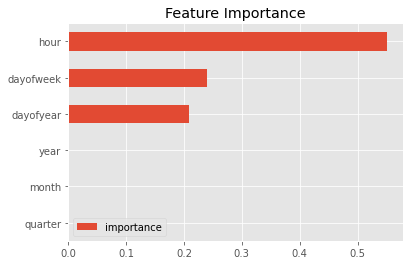

In [127]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [130]:
rf=RandomForestRegressor(n_estimators=1000, max_depth=30, min_samples_split=30, min_samples_leaf=20, verbose=True)
rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.4s finished


RandomForestRegressor(max_depth=30, min_samples_leaf=20, min_samples_split=30,
                      n_estimators=1000, verbose=True)

In [131]:
pred=rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
mse = mean_squared_error(y_test,pred)
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 613454.75


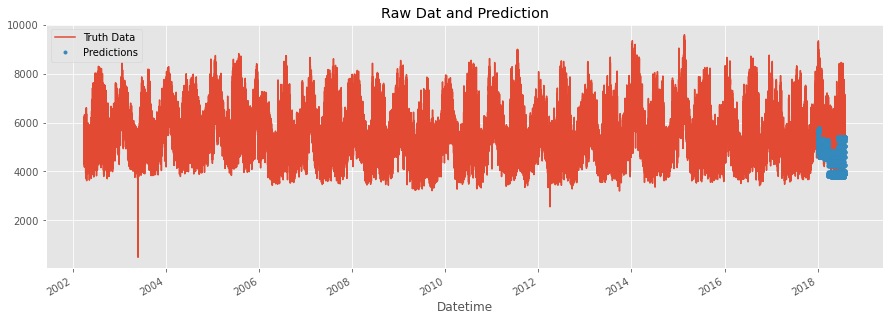

In [136]:
test['prediction'] = reg.predict(X_test)
dat1 = dat1.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = dat1[['PJMW_MW']].plot(figsize=(15, 5))
dat1['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [141]:
ax = df.loc[(dat1.index > '04-01-2018') & (dat1.index < '04-08-2018')]['PJMW_MW'].plot(figsize=(15, 5), title='Week Of Data')
dat1.loc[(dat1.index > '04-01-2018') & (dat1.index < '04-08-2018')]['prediction'].plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

KeyError: 'PJMW_MW'

In [142]:
score = np.sqrt(mean_squared_error(test['PJMW_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1319.30


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


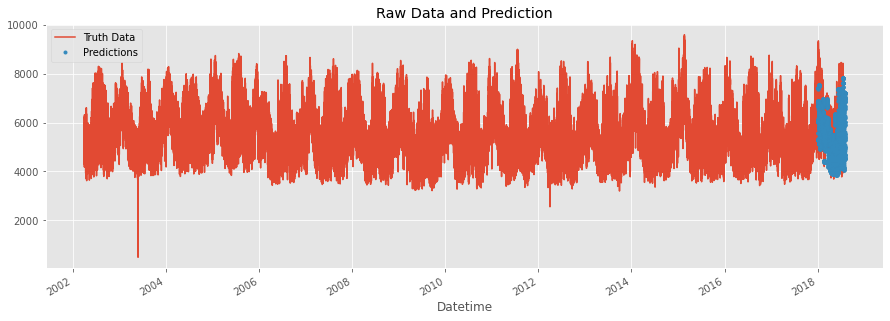

In [144]:
pred = rf.predict(X_test)
pred_df = pd.DataFrame(pred, index=X_test.index, columns=['pred'])
dat1 = dat1.merge(pred_df, how='left', left_index=True, right_index=True)

ax = dat1[['PJMW_MW']].plot(figsize=(15, 5))
dat1['pred'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

<AxesSubplot:ylabel='Frequency'>

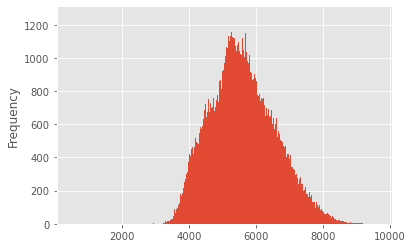

In [145]:
dat1['PJMW_MW'].plot(kind="hist",bins=500)

In [146]:
dat2 = dat1.query('PJMW_MW > 19_000').copy()

In [147]:
from sklearn.model_selection import TimeSeriesSplit

In [148]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1,gap=24)
dat2= dat2.sort_index()

In [152]:
target_map = dat2['PJMW_MW'].to_dict()

In [153]:
def add_lags(dframe):
    dat2 = dframe.copy()
    dat2['lag1'] = (dat2.index - pd.Timedelta('364 days')).map(target_map)
    dat2['lag2'] = (dat2.index - pd.Timedelta('728 days')).map(target_map)
    dat2['lag3'] = (dat2.index - pd.Timedelta('1092 days')).map(target_map)
    
    return dat2

In [154]:
dat2 = add_lags(dat2)

In [155]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1,gap=24)
dat2 = dat2.sort_index()

In [158]:
fold = 0
preds = []
scores = []

for train_idx, val_idx in tss.split(dat2):
    train = dat2.iloc[train_idx]
    test = dat2.iloc[val_idx]
    
    train = create_time_series_features(train)
    test = create_time_series_features(test)
    
    FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'lag1', 'lag2', 'lag3']

    OUTPUT = 'PJMW_MW'
    
    X_train = train[FEATURES]
    y_train = train[OUTPUT]
    
    X_test = test[FEATURES]
    y_test = test[OUTPUT]
    
    reg = xg.XGBRegressor(
        base_score=0.5,
        booster='gbtree',
        n_estimators=1000,
        early_stopping_rounds=50,
        objective='reg:linear',
        max_depth=3,
        learning_rate=0.01
    )
    
    reg.fit(
        X_train, 
        y_train,
        eval_set=[(X_train, y_train),(X_test, y_test)],
        verbose=100
    )
    
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

ValueError: Cannot have number of folds=6 greater than the number of samples=0.